In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [2]:
from model_mod import *

In [3]:
BATCH_SIZE = 256

In [4]:
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

en, sp = create_dataset(path_to_file, None)
print(en[-1])
print(sp[-1])

# Try experimenting with the size of that dataset
# num_examples = 118964
num_examples = 30000

input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'
<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [5]:
# input_tensor = input_tensor[-30000:, :]
# target_tensor = target_tensor[-30000:, :]

In [6]:
# Calculate max_length of the target tensors
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

BUFFER_SIZE = len(input_tensor_train)
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [7]:
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

In [8]:
my_model = NMT((vocab_inp_size, vocab_tar_size), inp_lang, targ_lang)

Epoch 1 Loss 0.3526
Time taken for an epoch: 25.6 sec

Epoch 2 Loss 0.3257
Time taken for an epoch: 25.2 sec

Epoch 3 Loss 0.3000
Time taken for an epoch: 25.4 sec

Epoch 4 Loss 0.2770
Time taken for an epoch: 25.3 sec

Epoch 5 Loss 0.2569
Time taken for an epoch: 25.2 sec

Epoch 6 Loss 0.2394
Time taken for an epoch: 25.6 sec

Epoch 7 Loss 0.2234
Time taken for an epoch: 25.1 sec

Epoch 8 Loss 0.2101
Time taken for an epoch: 25.2 sec

Epoch 9 Loss 0.2005
Time taken for an epoch: 25.2 sec

Epoch 10 Loss 0.1925
Time taken for an epoch: 25.6 sec

Epoch 11 Loss 0.1823
Time taken for an epoch: 26.3 sec

Epoch 12 Loss 0.1662
Time taken for an epoch: 27.7 sec

Epoch 13 Loss 0.1500
Time taken for an epoch: 28.6 sec

Epoch 14 Loss 0.1351
Time taken for an epoch: 28.4 sec

Epoch 15 Loss 0.1230
Time taken for an epoch: 28.3 sec

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


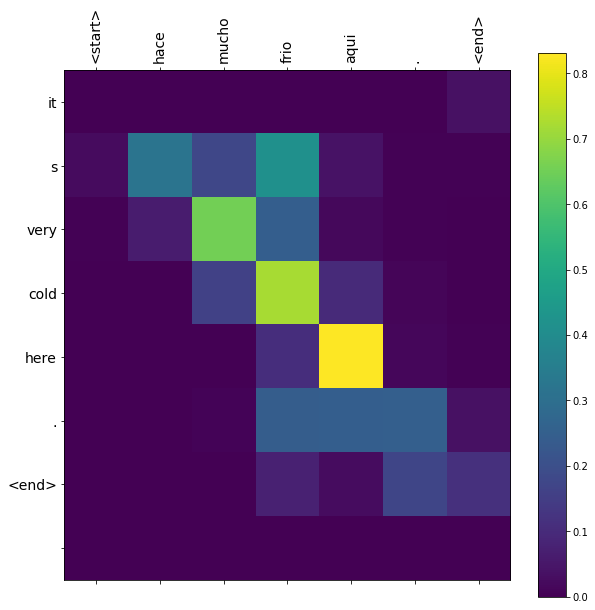

KeyboardInterrupt: 

In [14]:
EPOCHS = 45

for epoch in range(EPOCHS):

    start = time.time()

    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch += 1
        batch_loss = my_model.train(inp, targ)
        total_loss += batch_loss
        
#         if batch % 150 == 0:
#             print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
#                                                          batch,
#                                                          batch_loss.numpy()))
#             print('Time taken for 1 batch {:.1f} sec\n'.format(time.time() - start))

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                  total_loss / steps_per_epoch))
    print('Time taken for an epoch: {:.1f} sec\n'.format(time.time() - start))
    
#     my_model.translate(u'hace mucho frio aqui.', max_length_targ, max_length_inp)

    
    if (epoch + 1) % 15 == 0:
        my_model.translate(u'hace mucho frio aqui.', max_length_targ, max_length_inp)

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


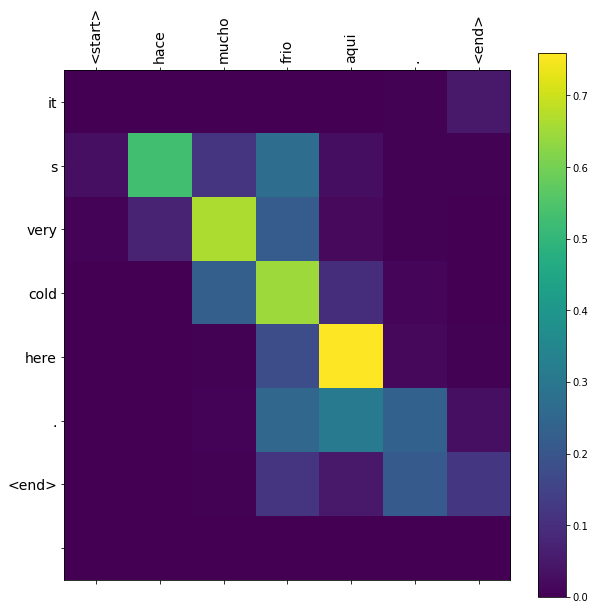

In [15]:
my_model.translate(u'hace mucho frio aqui.', max_length_targ, max_length_inp)

Input: <start> esta es mi vida . <end>
Predicted translation: this is my life . <end> 


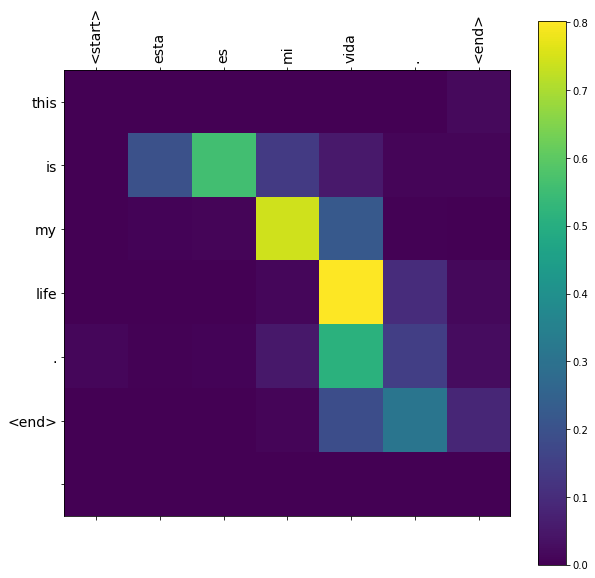

In [16]:
my_model.translate(u'esta es mi vida.', max_length_targ, max_length_inp)

Input: <start> ¿ todavia estan en casa ? <end>
Predicted translation: are you still at home ? <end> 


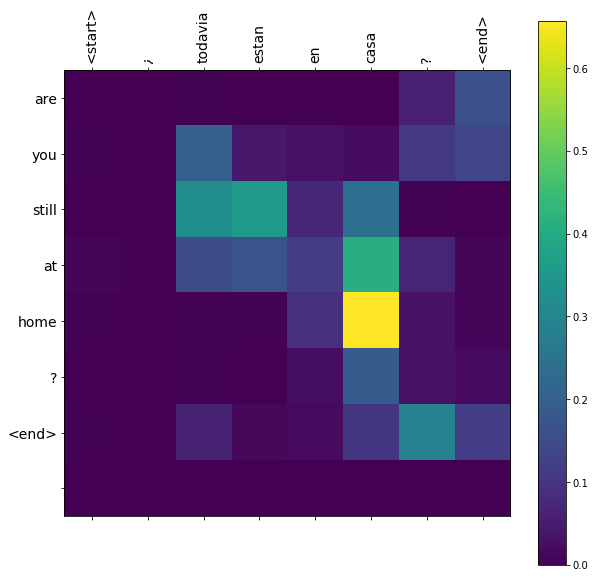

In [17]:
my_model.translate(u'¿todavia estan en casa?', max_length_targ, max_length_inp)

Input: <start> ¿ hay algun problema que pueda ayudar ? <end>
Predicted translation: is it really tall ? <end> 


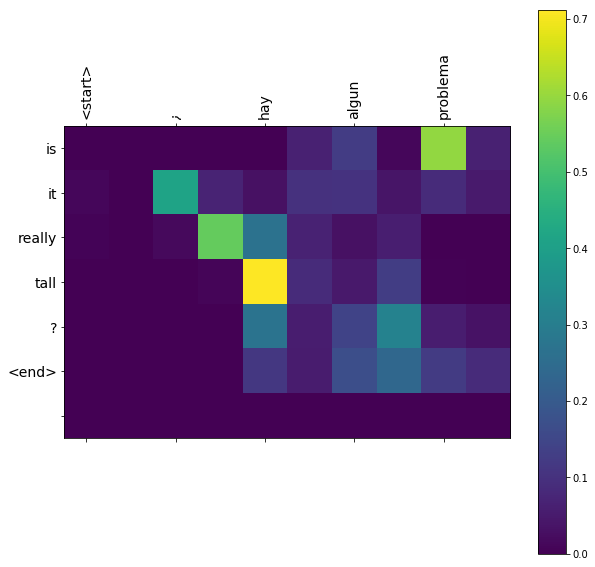

In [18]:
# wrong translation
my_model.translate(u'¿Hay algún problema que pueda ayudar?', max_length_targ, max_length_inp)